# SC1015 Project - Premier League Dataset

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.model_selection import train_test_split

In [2]:
resultsData = pd.read_csv('results.csv')
statsData = pd.read_csv('stats.csv')
statsData.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007


## Total of 240 Rows and 42 Columns in stats.CSV file

### 2 Categorical Variables, 40 Numeric Variables

In [3]:
statsData.info()
statsData.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  240 non-null    object 
 1   wins                  240 non-null    float64
 2   losses                240 non-null    float64
 3   goals                 240 non-null    float64
 4   total_yel_card        240 non-null    float64
 5   total_red_card        240 non-null    float64
 6   total_scoring_att     240 non-null    float64
 7   ontarget_scoring_att  240 non-null    float64
 8   hit_woodwork          240 non-null    float64
 9   att_hd_goal           240 non-null    float64
 10  att_pen_goal          240 non-null    float64
 11  att_freekick_goal     240 non-null    float64
 12  att_ibox_goal         240 non-null    float64
 13  att_obox_goal         240 non-null    float64
 14  goal_fastbreak        240 non-null    float64
 15  total_offside         2

(240, 42)

# Data Cleaning

## Check for any missing values in the stats Dataframe

In [4]:
statsDataFrame = pd.DataFrame(statsData)

# Check for missing values in each column
missing_values = statsDataFrame.isnull().sum()

# Print the number of missing values for each column
print(missing_values)
print()

# Filter out columns that have missing values and print them
missing_values_filtered = missing_values[missing_values > 0]
if len(missing_values_filtered) > 0:
    print("Columns with missing values and their count:")
    print(missing_values_filtered)
else:
    print("There are no missing values in any column.")

team                     0
wins                     0
losses                   0
goals                    0
total_yel_card           0
total_red_card           0
total_scoring_att        0
ontarget_scoring_att     0
hit_woodwork             0
att_hd_goal              0
att_pen_goal             0
att_freekick_goal        0
att_ibox_goal            0
att_obox_goal            0
goal_fastbreak           0
total_offside            0
clean_sheet              0
goals_conceded           0
saves                   20
outfielder_block         0
interception             0
total_tackle             0
last_man_tackle          0
total_clearance          0
head_clearance          20
own_goals                0
penalty_conceded         0
pen_goals_conceded       0
total_pass               0
total_through_ball      20
total_long_balls         0
backward_pass           80
total_cross              0
corner_taken             0
touches                  0
big_chance_missed       80
clearance_off_line       0
d

## Check the skewness for each of the columns with missing values

### Total of 6 columns with missing values will be placed in a pd DataFrame

In [5]:
missingValueColumns = pd.DataFrame(statsDataFrame[['saves', 'head_clearance', 'total_through_ball', 'backward_pass', 'big_chance_missed', 'dispossessed']])
missingValueColumns.skew()

saves                 0.392526
head_clearance        0.519139
total_through_ball    1.725295
backward_pass         0.713525
big_chance_missed     1.065818
dispossessed          0.639976
dtype: float64

### Analysis:

saves (0.392526): This shows a moderate positive skew, suggesting that most of the data are concentrated on the lower end, with fewer high values extending the tail to the right.

head_clearance (0.519139): Also indicates a moderate positive skew. Similar to "saves", most data points are lower, with some high values stretching the distribution to the right.

total_through_ball (1.725295): This has a high positive skewness, indicating a significant number of lower values and a long tail towards the higher values. This suggests that very high values are relatively rare but significantly impact the distribution's shape.

backward_pass (0.713525): Shows a positive skew but less extreme than total_through_ball. It indicates a concentration of data towards lower values with a tail of higher values.

big_chance_missed (1.065818): With a positive skewness greater than 1, this distribution has a long right tail. There are significantly more lower values, with the higher values stretching the distribution.

dispossessed (0.639976): Exhibits a moderate positive skew, indicating a concentration of lower values with a tail of higher values, but not as pronounced as total_through_ball or big_chance_missed.

Due to the existence of missing values, we decided to exclude the columns for head_clearance, total_through_ball, backward_pass, dispossessed, and saves. These columns pertain to actions such as clearing the ball using the head, executing passes in dynamic situations, making passes back towards one's own side, losing possession to an opponent, and preventing shots from scoring.

As a result, we are now concentrating on the 'big_chance_missed' columns, which we consider to be a strong predictor of a team's goals scored and its standing. The 'big_chance_missed' metric records significant scoring opportunities that were not capitalized on, potentially altering the outcome of a game.

Based on the positive skewness of the data, median imputation is generally more robust than mean imputation. The median is less affected by outliers and skewed data, making it a more representative measure of central tendency for skewed distributions. Therefore based on this, we decided to fill in the missing values for the saves and big_chance_missed, based on the median value for each club (20 Clubs total)

## Dropping of columns: head_clearance, total_through_ball, backward_pass, dispossessed

In [6]:
statsDataFrame.drop(columns=['head_clearance', 'total_through_ball', 'backward_pass', 'dispossessed', 'saves'], inplace=True)
statsDataFrame.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_long_balls,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,2397.0,918.0,258.0,25686.0,NaN,1.0,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,2270.0,897.0,231.0,24010.0,NaN,2.0,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,2800.0,1107.0,282.0,24150.0,NaN,1.0,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,2045.0,873.0,278.0,25592.0,NaN,1.0,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,2408.0,796.0,181.0,22200.0,NaN,2.0,0.0,51.0,24.0,2006-2007


### statsDataFrame now has 37 columns

## Fill in missing values for big_chance_missed using Median

In [7]:
# Derby County/Charlton Athletic/Sheffield United/Portsmouth
filtered_indices = statsDataFrame['team'] == 'Arsenal'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Aston Villa'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Birmingham City'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Blackburn Rovers'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Bolton Wanderers'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Burnley'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Charlton Athletic'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Chelsea'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Derby County'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Everton'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Fulham'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Hull City'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Liverpool'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Manchester City'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Manchester United'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Middlesbrough'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Newcastle United'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Reading'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Portsmouth'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Sheffield United'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Sunderland'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Stoke City'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Tottenham Hotspur'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Watford'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'West Ham United'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'West Bromwich Albion'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Wigan Athletic'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)


filtered_indices = statsDataFrame['team'] == 'Wolverhampton Wanderers'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

Median of filtered column: 54.0
Median of filtered column: 30.0
Median of filtered column: 30.0
Median of filtered column: 40.5
Median of filtered column: 33.5
Median of filtered column: 22.0
Median of filtered column: nan
Median of filtered column: 42.0
Median of filtered column: nan
Median of filtered column: 39.5
Median of filtered column: 38.0
Median of filtered column: 22.0
Median of filtered column: 52.0
Median of filtered column: 55.0
Median of filtered column: 46.5
Median of filtered column: 19.0
Median of filtered column: 34.0
Median of filtered column: 25.0
Median of filtered column: nan
Median of filtered column: nan
Median of filtered column: 29.0
Median of filtered column: 35.0
Median of filtered column: 48.5
Median of filtered column: 31.0
Median of filtered column: 37.0
Median of filtered column: 31.0
Median of filtered column: 39.0
Median of filtered column: 29.0


## Adding of new column "Draw" to the statsDataFrame

Upon reviewing the statsDataFrame, we noticed the absence of a "draw" column that would reflect the number of draws a football team had during the season. Considering each team plays 38 matches annually, we computed the "draw" figures by deducting the sum of wins and losses from 38. After calculating this data, we would integrate this new "draw" column into the existing dataFrame.

In [8]:
# Calculate the "draw" column first
statsDataFrame['draw'] = 38 - statsDataFrame['wins'] - statsDataFrame['losses']

# Get the position of the 'losses' column
# The new column will be inserted at position + 1
position = statsDataFrame.columns.get_loc('losses') + 1

# Insert the 'draw' column next to 'losses'
statsDataFrame.insert(position, 'draw_temp', statsDataFrame['draw'])

# Drop the original 'draw' column and rename 'draw_temp' to 'draw'
statsDataFrame.drop('draw', axis=1, inplace=True)
statsDataFrame.rename(columns={'draw_temp': 'draw'}, inplace=True)

statsDataFrame.shape

(240, 38)

## Adding of new column "total_points" to the statsDataFrame

Using wins and draw to tally the total points; 1 win = 3 points, 1 draw = 1 point. 
At the end of each season, team with most points would win.

In [9]:
# Calculate the "total_points" column first
statsDataFrame['total_points'] = statsDataFrame['wins'] * 3 + statsDataFrame['draw'] 

# Get the position of the 'draw' column
# The new column will be inserted at position + 1
position = statsDataFrame.columns.get_loc('draw') + 1

# Insert the 'total_points' column next to 'draw'
statsDataFrame.insert(position, 'total_points_temp', statsDataFrame['total_points'])

# Drop the original 'draw' column and rename 'draw_temp' to 'draw'
statsDataFrame.drop('total_points', axis=1, inplace=True)
statsDataFrame.rename(columns={'total_points_temp': 'total_points'}, inplace=True)

statsDataFrame.shape

(240, 39)

## Adding of new column "Placing" to the statsDataFrame
"Placing" will mean the position the team finished in for the season.

In [10]:
repetitions = 7
statsDataFrame['placing'] = np.tile(range(1, 21), 12)[:len(statsDataFrame)]


# Get the position of the 'total_points' column
# The new column will be inserted at position + 1
position = statsDataFrame.columns.get_loc('total_points') + 1

# Insert the 'placing' column next to 'draw'
statsDataFrame.insert(position, 'placing_temp', statsDataFrame['placing'])

# Drop the original 'draw' column and rename 'draw_temp' to 'draw'
statsDataFrame.drop('placing', axis=1, inplace=True)
statsDataFrame.rename(columns={'placing_temp': 'placing'}, inplace=True)

In [11]:
statsDataFrame.head()

,team,wins,losses,draw,total_points,placing,goals,total_yel_card,total_red_card,total_scoring_att,...,total_long_balls,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,5.0,89.0,1,83.0,60.0,1.0,698.0,...,2397.0,918.0,258.0,25686.0,46.5,1.0,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,11.0,83.0,2,64.0,62.0,4.0,636.0,...,2270.0,897.0,231.0,24010.0,42.0,2.0,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,8.0,68.0,3,57.0,44.0,0.0,668.0,...,2800.0,1107.0,282.0,24150.0,52.0,1.0,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,11.0,68.0,4,63.0,59.0,3.0,638.0,...,2045.0,873.0,278.0,25592.0,54.0,1.0,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,9.0,60.0,5,57.0,48.0,3.0,520.0,...,2408.0,796.0,181.0,22200.0,48.5,2.0,0.0,51.0,24.0,2006-2007


# Exploratory Data Analysis

In [12]:
points = pd.DataFrame(statsDataFrame['total_points']) # Response
goals = pd.DataFrame(statsDataFrame['goals'])
goals_conceded = pd.DataFrame(statsDataFrame['goals_conceded'])
touches = pd.DataFrame(statsDataFrame['touches'])
clean_sheet = pd.DataFrame(statsDataFrame['clean_sheet'])
total_scoring_att = pd.DataFrame(statsDataFrame['total_scoring_att'])

<Axes: >

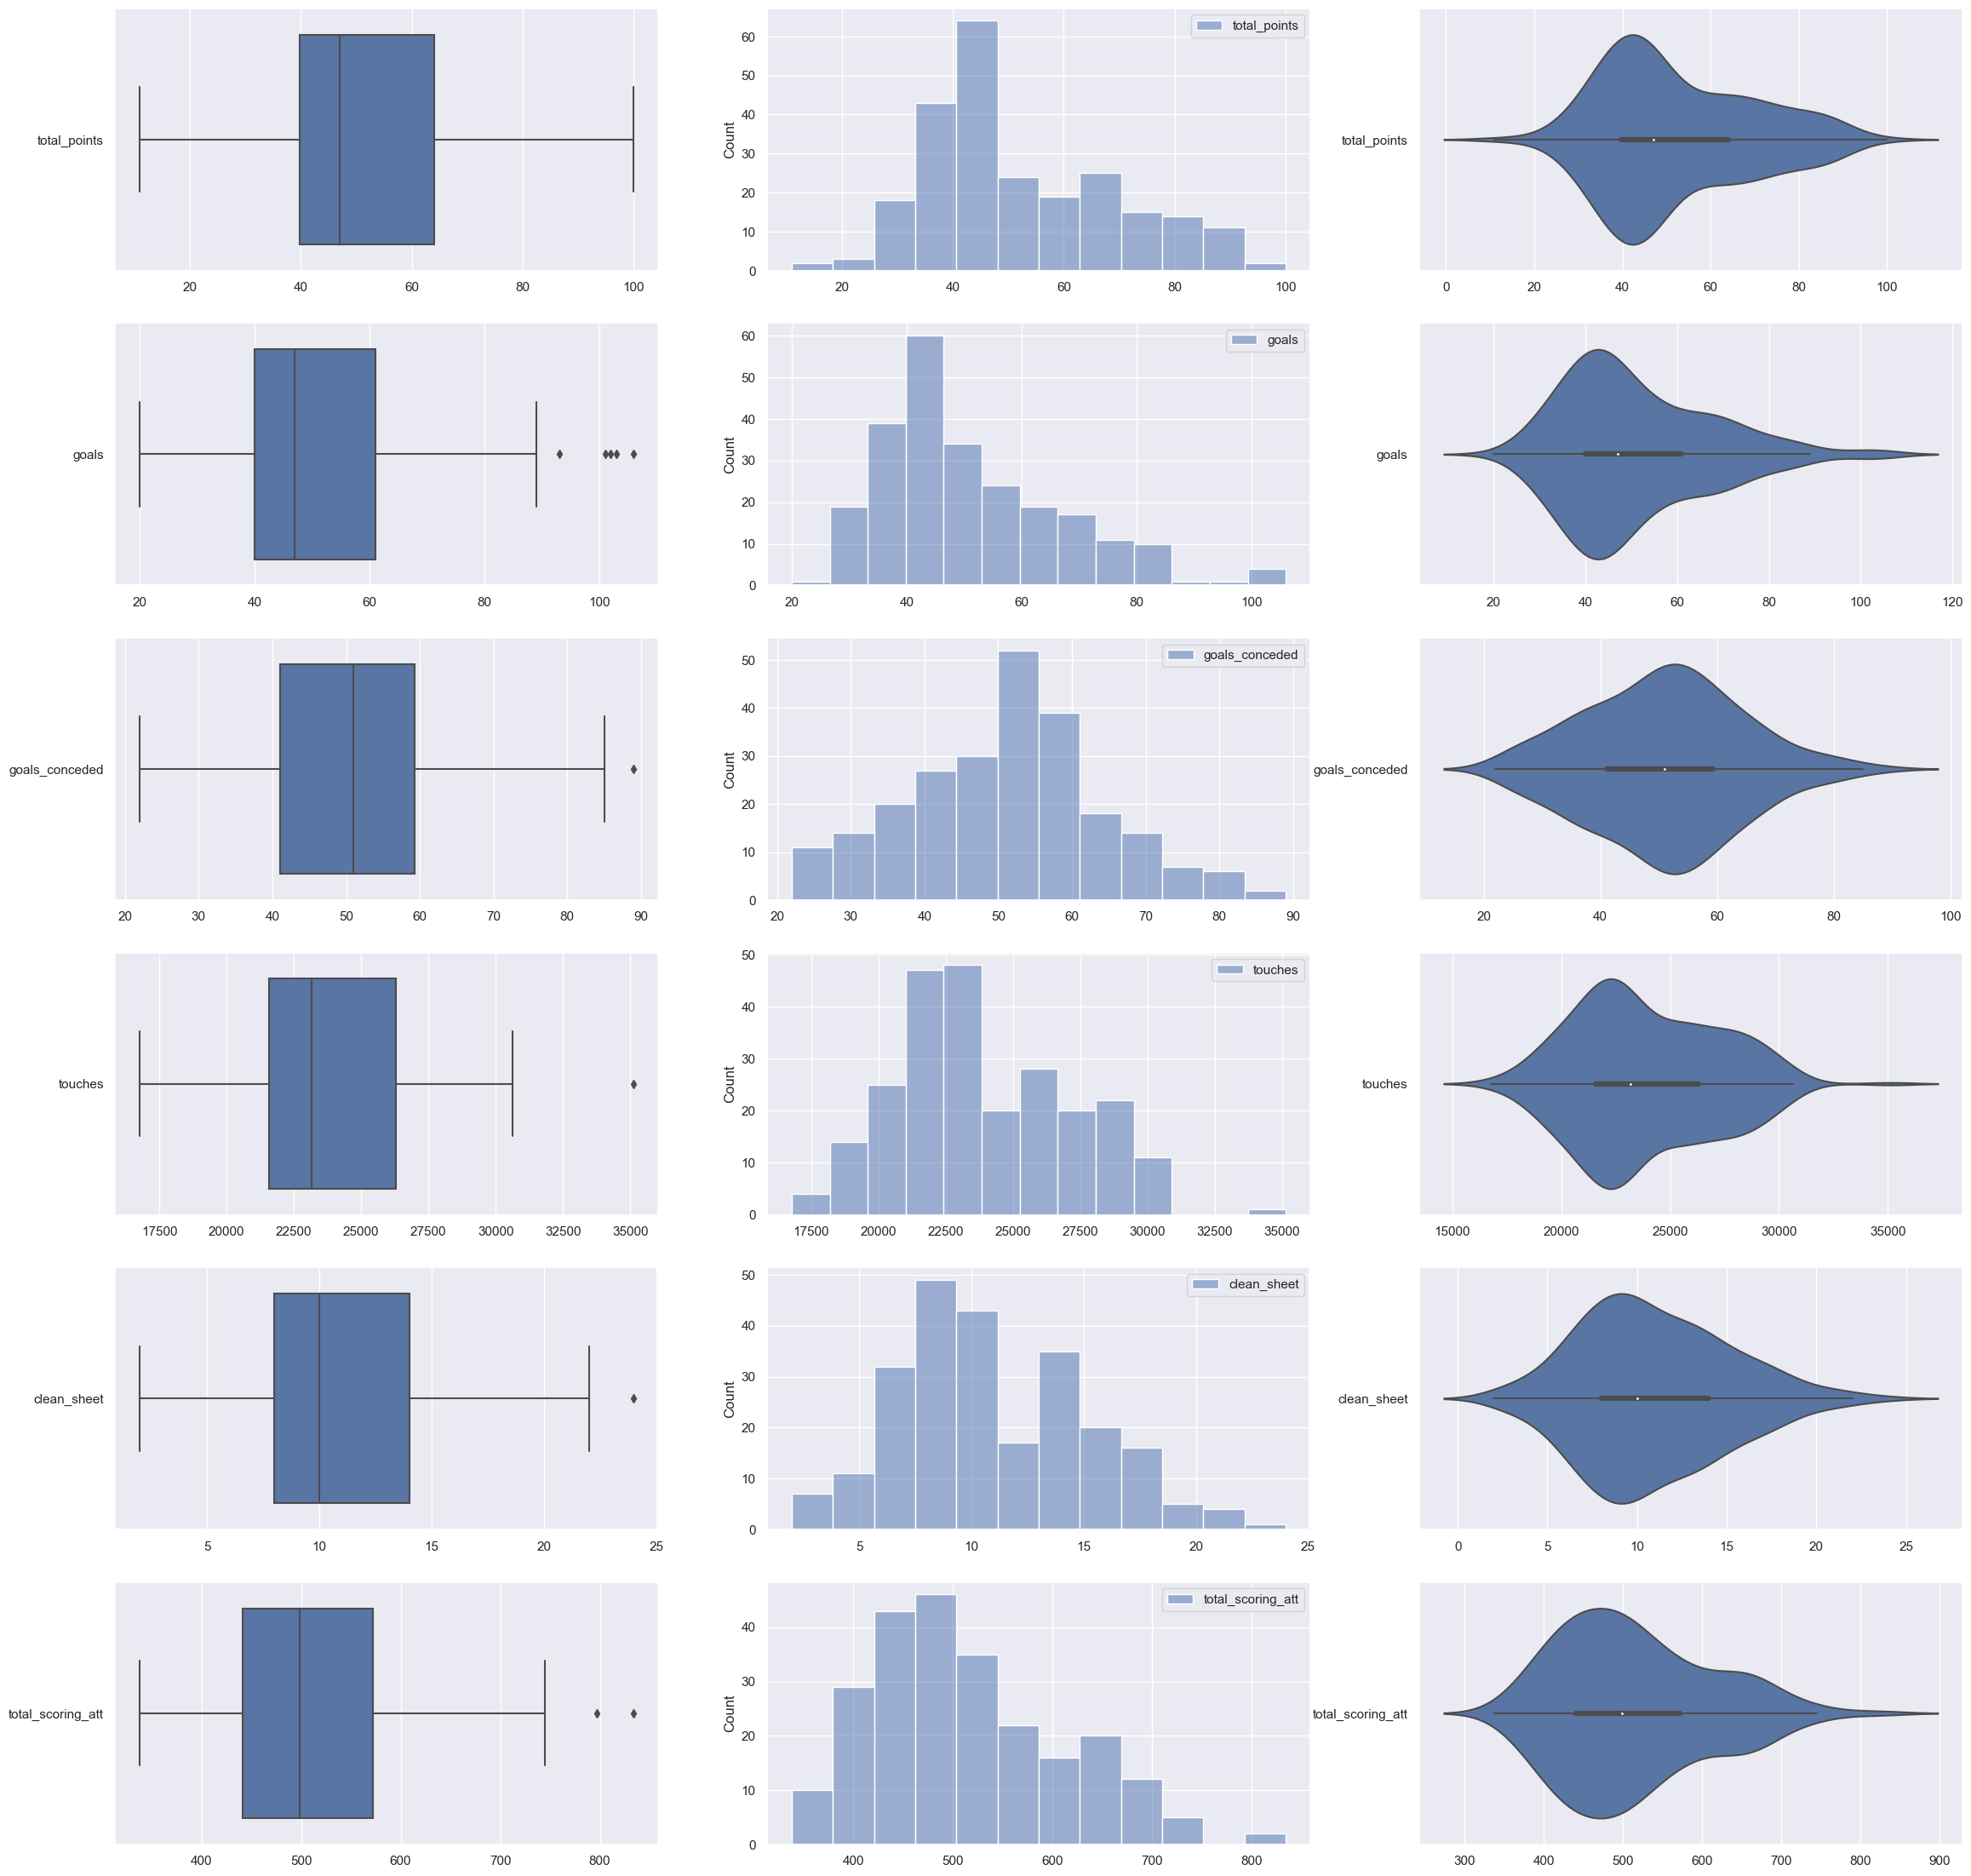

In [13]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(6, 3, figsize=(28, 28))

# Plot the basic uni-variate figures for total points
sb.boxplot(data = points, orient = "h", ax = axes[0,0])
sb.histplot(data = points, ax = axes[0,1])
sb.violinplot(data = points, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for goals
sb.boxplot(data = goals, orient = "h", ax = axes[1,0])
sb.histplot(data = goals, ax = axes[1,1])
sb.violinplot(data = goals, orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for goal_conceded
sb.boxplot(data = goals_conceded, orient = "h", ax = axes[2,0])
sb.histplot(data = goals_conceded, ax = axes[2,1])
sb.violinplot(data = goals_conceded, orient = "h", ax = axes[2,2])

# Plot the basic uni-variate figures for touches
sb.boxplot(data = touches, orient = "h", ax = axes[3,0])
sb.histplot(data = touches, ax = axes[3,1])
sb.violinplot(data = touches, orient = "h", ax = axes[3,2])

# Plot the basic uni-variate figures for clean_sheet
sb.boxplot(data = clean_sheet, orient = "h", ax = axes[4,0])
sb.histplot(data = clean_sheet, ax = axes[4,1])
sb.violinplot(data = clean_sheet, orient = "h", ax = axes[4,2])

# Plot the basic uni-variate figures for total_scoring_att
sb.boxplot(data = total_scoring_att, orient = "h", ax = axes[5,0])
sb.histplot(data = total_scoring_att, ax = axes[5,1])
sb.violinplot(data = total_scoring_att, orient = "h", ax = axes[5,2])

## Correlation Matrix between variables

,total_points,goals,goals_conceded,touches,clean_sheet,total_scoring_att
total_points,1.000000,0.897552,-0.844932,0.706400,0.786316,0.758362
goals,0.897552,1.000000,-0.624305,0.733838,0.573981,0.788062
goals_conceded,-0.844932,-0.624305,1.000000,-0.533557,-0.871475,-0.610340
touches,0.706400,0.733838,-0.533557,1.000000,0.556637,0.711154
clean_sheet,0.786316,0.573981,-0.871475,0.556637,1.000000,0.558961
total_scoring_att,0.758362,0.788062,-0.610340,0.711154,0.558961,1.000000


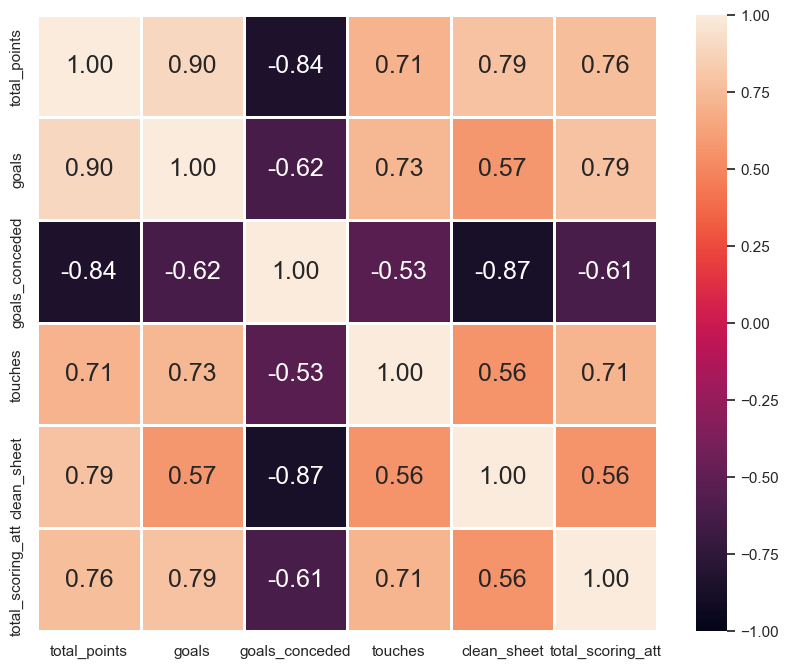

In [14]:
jointDF = pd.concat([points, goals, goals_conceded, touches, clean_sheet, total_scoring_att], axis = 1).reindex(points.index)
f = plt.figure(figsize = (10,8))
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".2f", annot_kws = {"size" : 18})
jointDF.corr()

### Analysis:

Goals: Highly positively correlated with total points (0.90), it gets in line for considering to be added to the model.

Goals Conceded: The defender of a team is another prospect with a strong negative correlation with total points (-0.84) and hence might be included in the list as indicator of the defensive strength.

Touches and Clean Sheet: Sufficiently related with total points (0.71 and 0.79 respectively), indicating they are very important and remember that this strongly correlated with each other (that is the coefficient is 0.56), suggesting multicollinearity if both are included.

Total Scoring Att: In high degree positive correlation with total points (0.76) this factor shows great individual impact upon the overall team result.

In [15]:
statsDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  240 non-null    object 
 1   wins                  240 non-null    float64
 2   losses                240 non-null    float64
 3   draw                  240 non-null    float64
 4   total_points          240 non-null    float64
 5   placing               240 non-null    int64  
 6   goals                 240 non-null    float64
 7   total_yel_card        240 non-null    float64
 8   total_red_card        240 non-null    float64
 9   total_scoring_att     240 non-null    float64
 10  ontarget_scoring_att  240 non-null    float64
 11  hit_woodwork          240 non-null    float64
 12  att_hd_goal           240 non-null    float64
 13  att_pen_goal          240 non-null    float64
 14  att_freekick_goal     240 non-null    float64
 15  att_ibox_goal         2

# Linear Regression

As we aim to derive valuable insights that contribute to football betting, we plan to explore the relationship between total points and the variables 'goals', 'goals_conceded', 'clean_sheet', 'total_scoring_att', and 'goal_fastbreak' using multivariate linear regression. We intend to structure our data to model it as a time series. For instance, we'll use data from 2006-2015 as training data to test against the 2016 season, and data from 2006-2016 as training data to test against the 2017 season, and so on. The model will predict the total points based on the predictors mentioned above. By testing the model against the data from 2016, 2017, and 2018, we will evaluate whether the model’s prediction accuracy is sufficiently reliable to forecast subsequent season winners.

## Bivariate Linear Regression

Model results for training on 9_seasons and testing on the next season:
Model details for predictor: goals
 Intercept of Regression: 3.3445692406716176
 Coefficient of Regression for goals: 0.96031240151734
 Goodness of Fit - Train Dataset:
  R^2 = 0.7913
  MSE = 60.0978
 Goodness of Fit - Test Dataset:
  R^2 = 0.7739
  MSE = 60.7098

Model details for predictor: goals_conceded
 Intercept of Regression: 106.75885301565654
 Coefficient of Regression for goals_conceded: -1.0747341798205068
 Goodness of Fit - Train Dataset:
  R^2 = 0.7073
  MSE = 84.2747
 Goodness of Fit - Test Dataset:
  R^2 = 0.7935
  MSE = 55.4489

Model details for predictor: clean_sheet
 Intercept of Regression: 18.599273039419465
 Coefficient of Regression for clean_sheet: 3.061932481188893
 Goodness of Fit - Train Dataset:
  R^2 = 0.5993
  MSE = 115.3745
 Goodness of Fit - Test Dataset:
  R^2 = 0.6895
  MSE = 83.3526

Model details for predictor: total_scoring_att
 Intercept of Regression: -19.647305901460214
 Coef

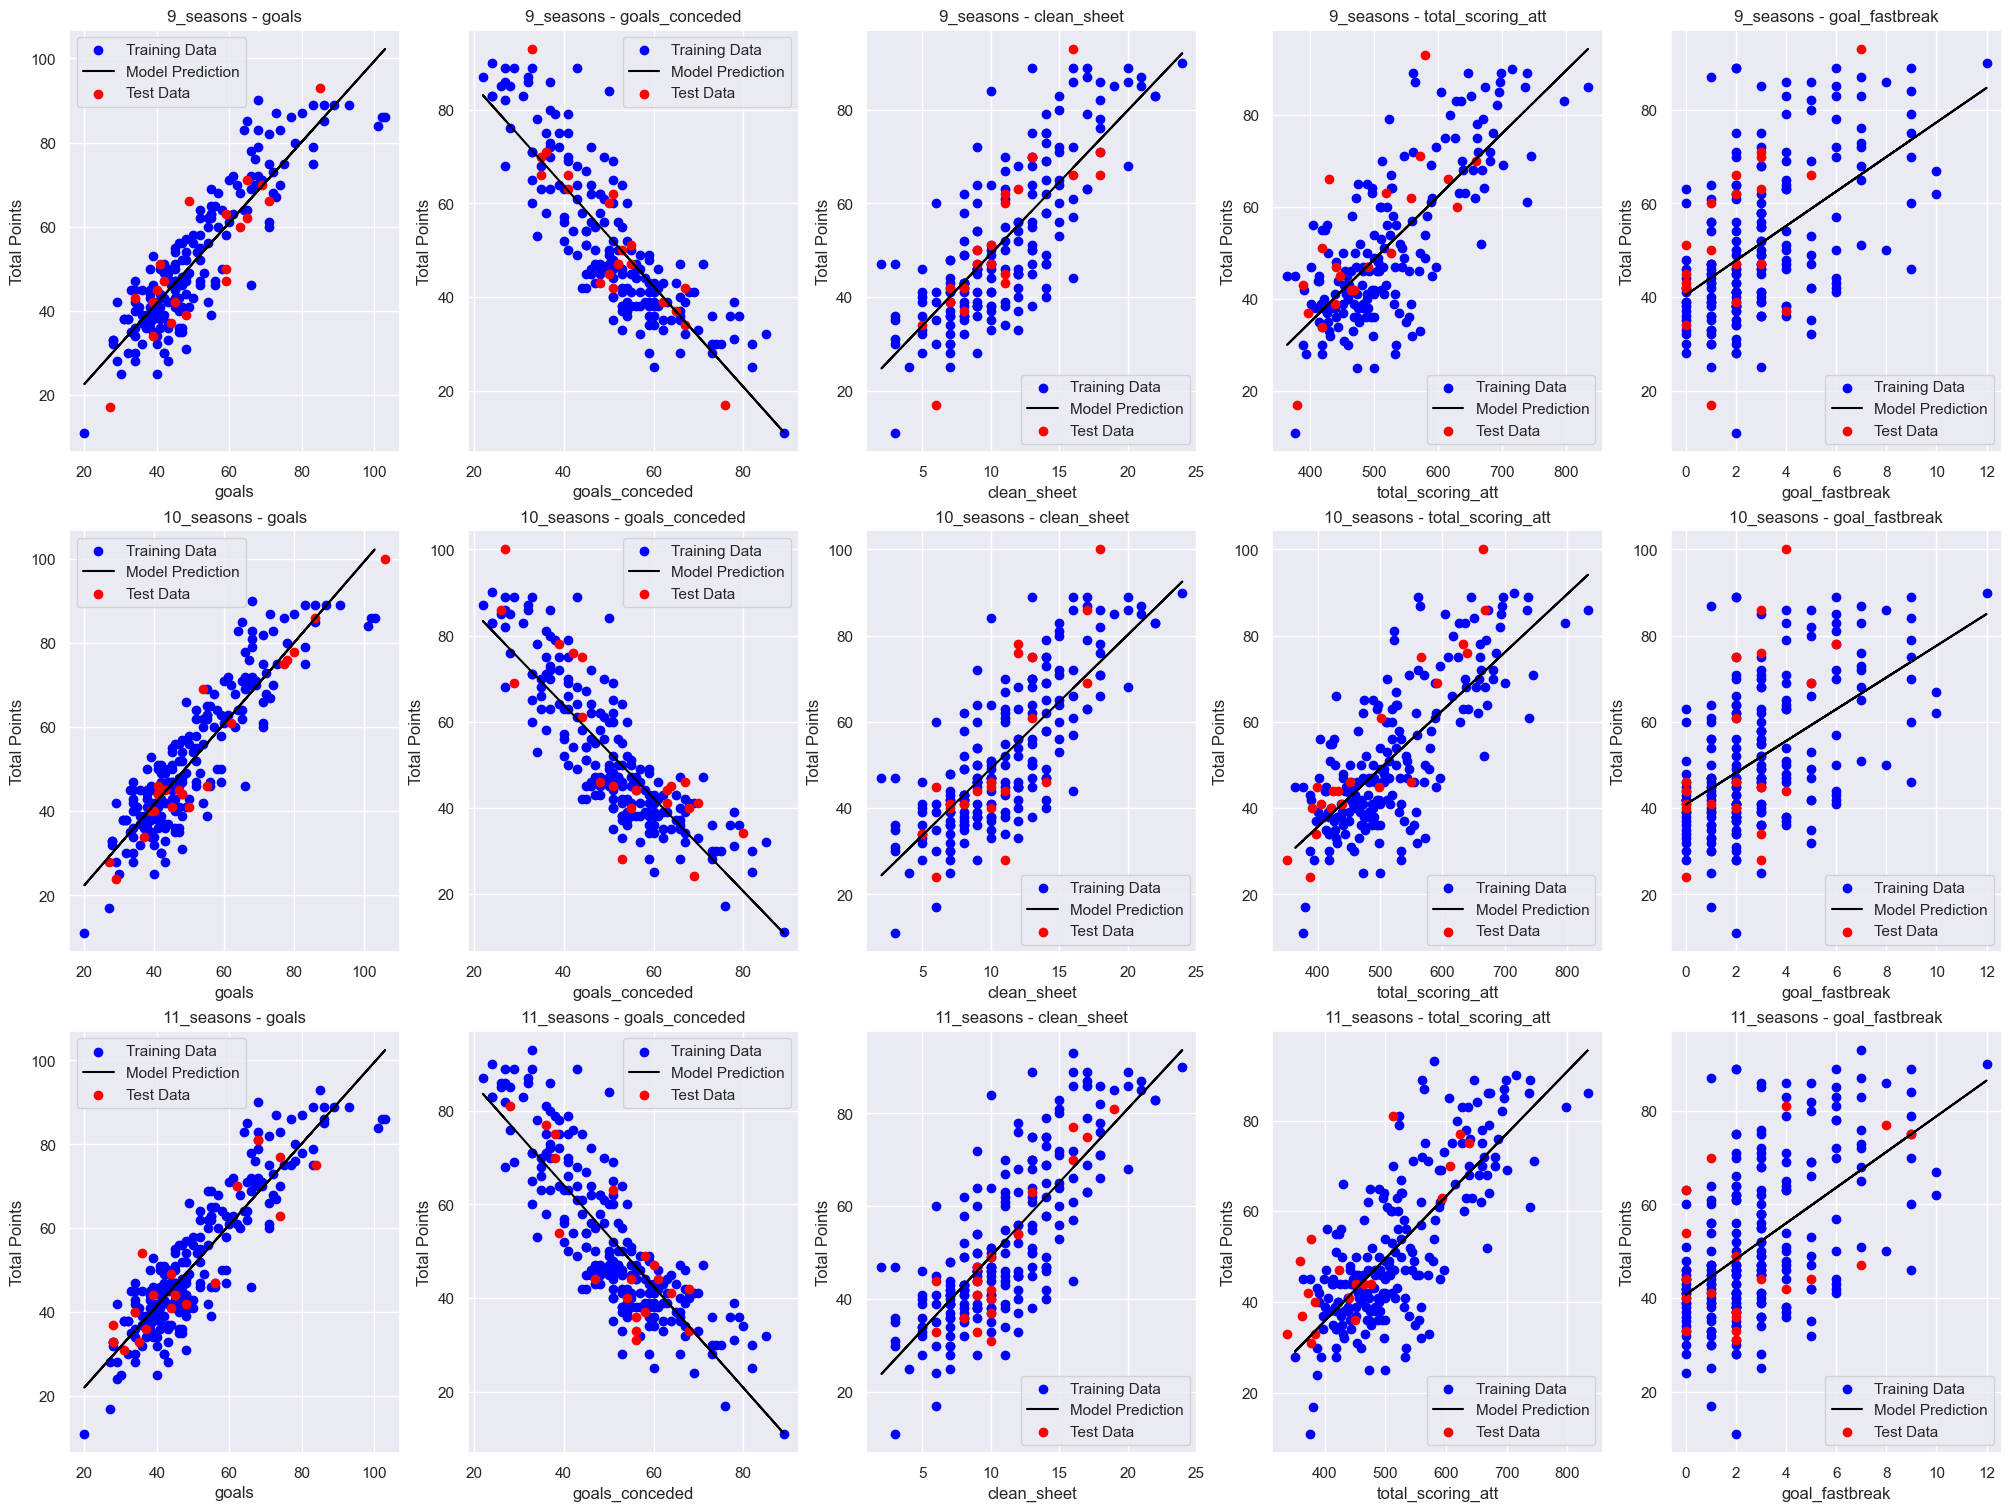

In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Data splits for multiple seasons
season_splits = {
    "9_seasons": (statsDataFrame.iloc[:180], statsDataFrame.iloc[181:201]),
    "10_seasons": (statsDataFrame.iloc[:200], statsDataFrame.iloc[201:221]),
    "11_seasons": (statsDataFrame.iloc[:220], statsDataFrame.iloc[221:241])
}

predictors = ["goals", "goals_conceded", "clean_sheet", "total_scoring_att", "goal_fastbreak"]

# Initialize a Linear Regression model
linreg = LinearRegression()

# Setup the figure for plotting
fig, axes = plt.subplots(nrows=len(season_splits), ncols=len(predictors), figsize=(20, 15), constrained_layout=True)
if len(season_splits) == 1:  # Handling the case where there's only one row
    axes = [axes]

# Iterate over each season and each predictor
for season_index, (season, (train_data, test_data)) in enumerate(season_splits.items()):
    print(f"Model results for training on {season} and testing on the next season:")
    for predictor_index, predictor in enumerate(predictors):
        # Fit the model using training data for each predictor
        X_train = train_data[[predictor]]
        y_train = train_data["total_points"]
        linreg.fit(X_train, y_train)
        
        # Compute R² and predict on training data to compute MSE
        train_score = linreg.score(X_train, y_train)
        y_train_pred = linreg.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        
        # Predict on testing data
        X_test = test_data[[predictor]]
        y_test = test_data["total_points"]
        test_score = linreg.score(X_test, y_test)
        y_test_pred = linreg.predict(X_test)
        test_mse = mean_squared_error(y_test, y_test_pred)
        
        # Plotting
        ax = axes[season_index][predictor_index]
        ax.scatter(X_train, y_train, color="blue", label="Training Data")
        ax.plot(X_train, y_train_pred, color="black", label="Model Prediction")
        ax.scatter(X_test, y_test, color="red", label="Test Data")
        ax.set_title(f"{season} - {predictor}")
        ax.set_xlabel(predictor)
        ax.set_ylabel("Total Points")
        ax.legend()

        # Print the results including intercept and coefficients
        print(f"Model details for predictor: {predictor}")
        print(f" Intercept of Regression: {linreg.intercept_}")
        print(f" Coefficient of Regression for {predictor}: {linreg.coef_[0]}")
        print(f" Goodness of Fit - Train Dataset:")
        print(f"  R^2 = {train_score:.4f}")
        print(f"  MSE = {train_mse:.4f}")
        print(f" Goodness of Fit - Test Dataset:")
        print(f"  R^2 = {test_score:.4f}")
        print(f"  MSE = {test_mse:.4f}")
        print()
    print("-----------------------------------------------------------------")

plt.show()

In [25]:
statsDataFrame.head(181)

,team,wins,losses,draw,total_points,placing,goals,total_yel_card,total_red_card,total_scoring_att,...,total_long_balls,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,5.0,89.0,1,83.0,60.0,1.0,698.0,...,2397.0,918.0,258.0,25686.0,46.5,1.0,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,11.0,83.0,2,64.0,62.0,4.0,636.0,...,2270.0,897.0,231.0,24010.0,42.0,2.0,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,8.0,68.0,3,57.0,44.0,0.0,668.0,...,2800.0,1107.0,282.0,24150.0,52.0,1.0,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,11.0,68.0,4,63.0,59.0,3.0,638.0,...,2045.0,873.0,278.0,25592.0,54.0,1.0,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,9.0,60.0,5,57.0,48.0,3.0,520.0,...,2408.0,796.0,181.0,22200.0,48.5,2.0,0.0,51.0,24.0,2006-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Hull City,8.0,19.0,11.0,35.0,17,33.0,73.0,6.0,428.0,...,2726.0,804.0,169.0,22464.0,22.0,7.0,2.0,36.0,23.0,2014-2015
177,Queens Park Rangers,8.0,24.0,6.0,30.0,18,42.0,75.0,3.0,534.0,...,3004.0,756.0,179.0,21907.0,39.0,6.0,2.0,57.0,20.0,2014-2015
178,Burnley,7.0,19.0,12.0,33.0,19,28.0,64.0,2.0,430.0,...,3021.0,783.0,171.0,21624.0,27.0,8.0,2.0,53.0,15.0,2014-2015
179,Sunderland,7.0,14.0,17.0,38.0,20,31.0,94.0,2.0,408.0,...,2484.0,687.0,186.0,22037.0,23.0,3.0,0.0,82.0,17.0,2014-2015


## Multivariate Linear Regression

Intercept of Regression for 9 Seasons Training, Test on 10th Season: b =  36.05938002504202
Coefficients of Regression for 9 Seasons Training, Test on 10th Season:
          Predictors  Coefficients
0              goals      0.641326
1     goals_conceded     -0.445789
2        clean_sheet      0.578127
3  total_scoring_att     -0.000920
4     goal_fastbreak      0.093727



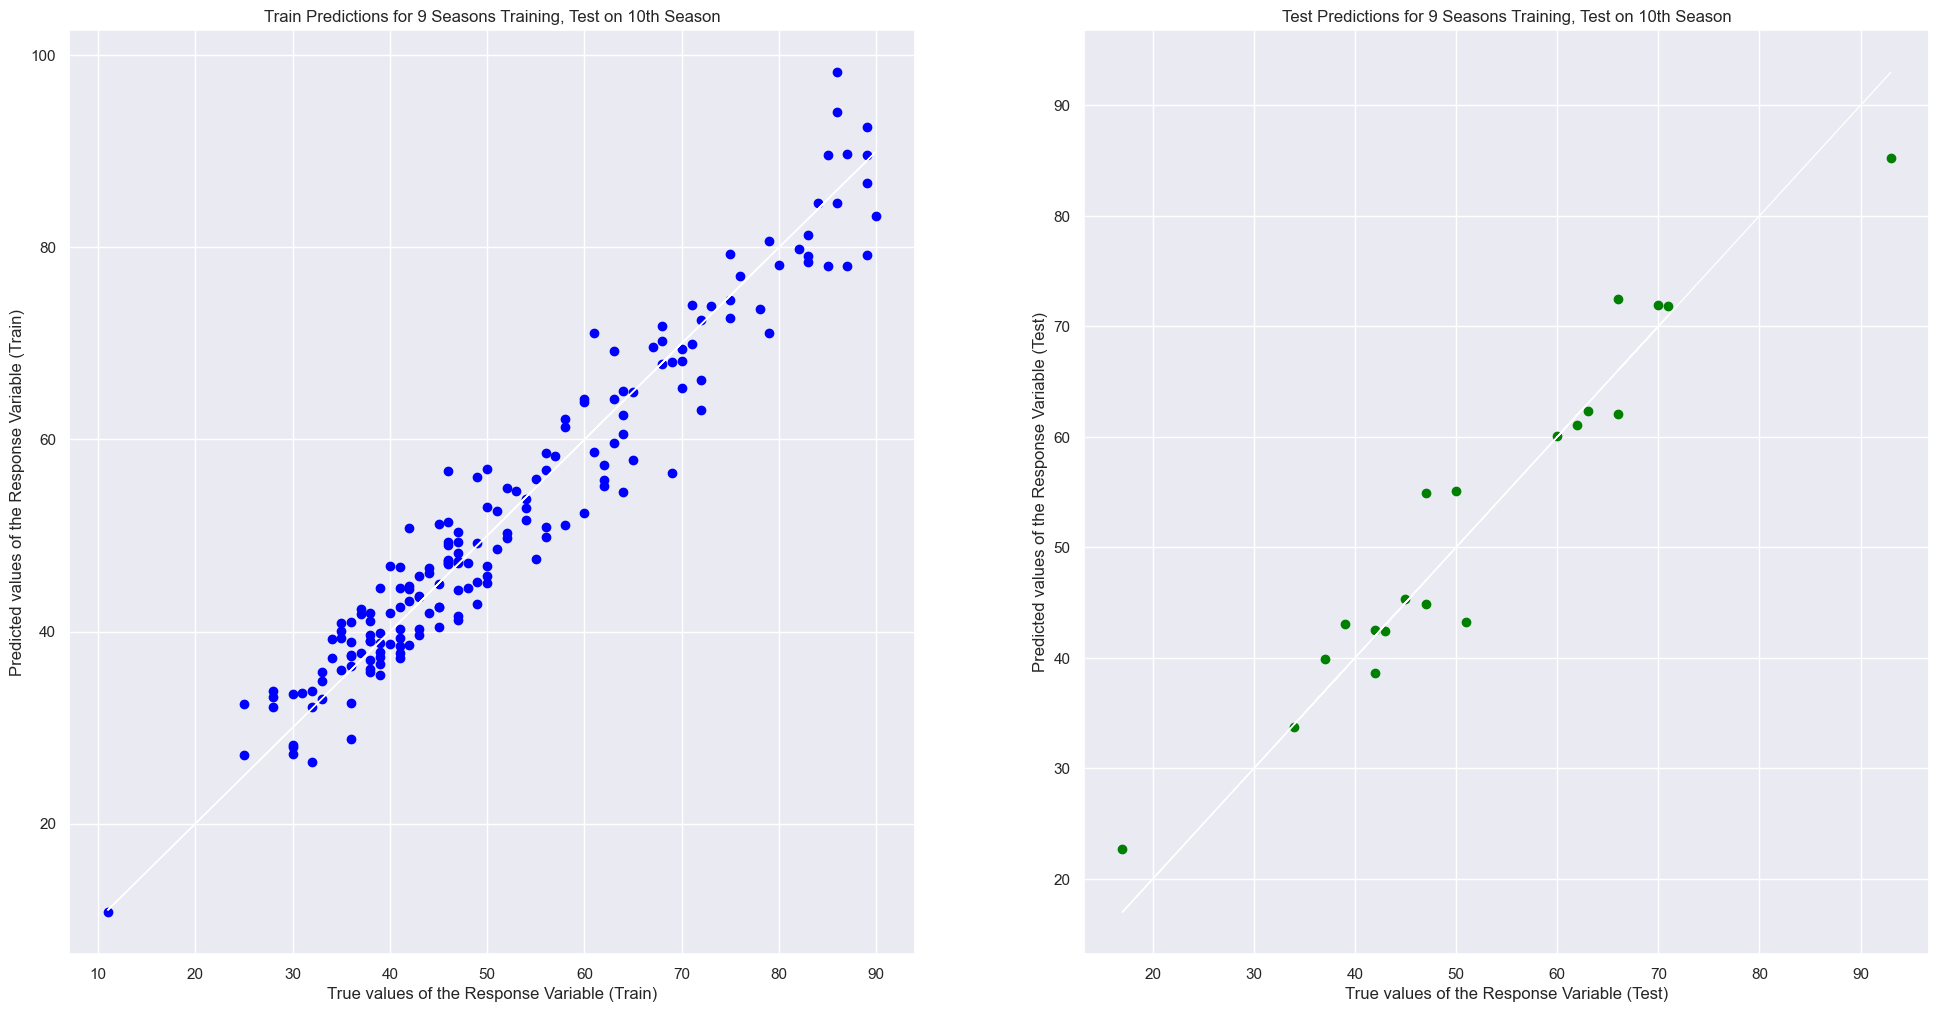

Goodness of Fit of Model 	Train Dataset (9 Seasons Training, Test on 10th Season)
Explained Variance (R^2) 	: 0.9384270111880074
Mean Squared Error (MSE) 	: 17.731051962532604

Goodness of Fit of Model 	Test Dataset (9 Seasons Training, Test on 10th Season)
Explained Variance (R^2) 	: 0.9356507166650995
Mean Squared Error (MSE) 	: 17.276978209379106

Intercept of Regression for 10 Seasons Training, Test on 11th Season: b =  37.8533392685438
Coefficients of Regression for 10 Seasons Training, Test on 11th Season:
          Predictors  Coefficients
0              goals      0.636693
1     goals_conceded     -0.463683
2        clean_sheet      0.570049
3  total_scoring_att     -0.002110
4     goal_fastbreak      0.101228



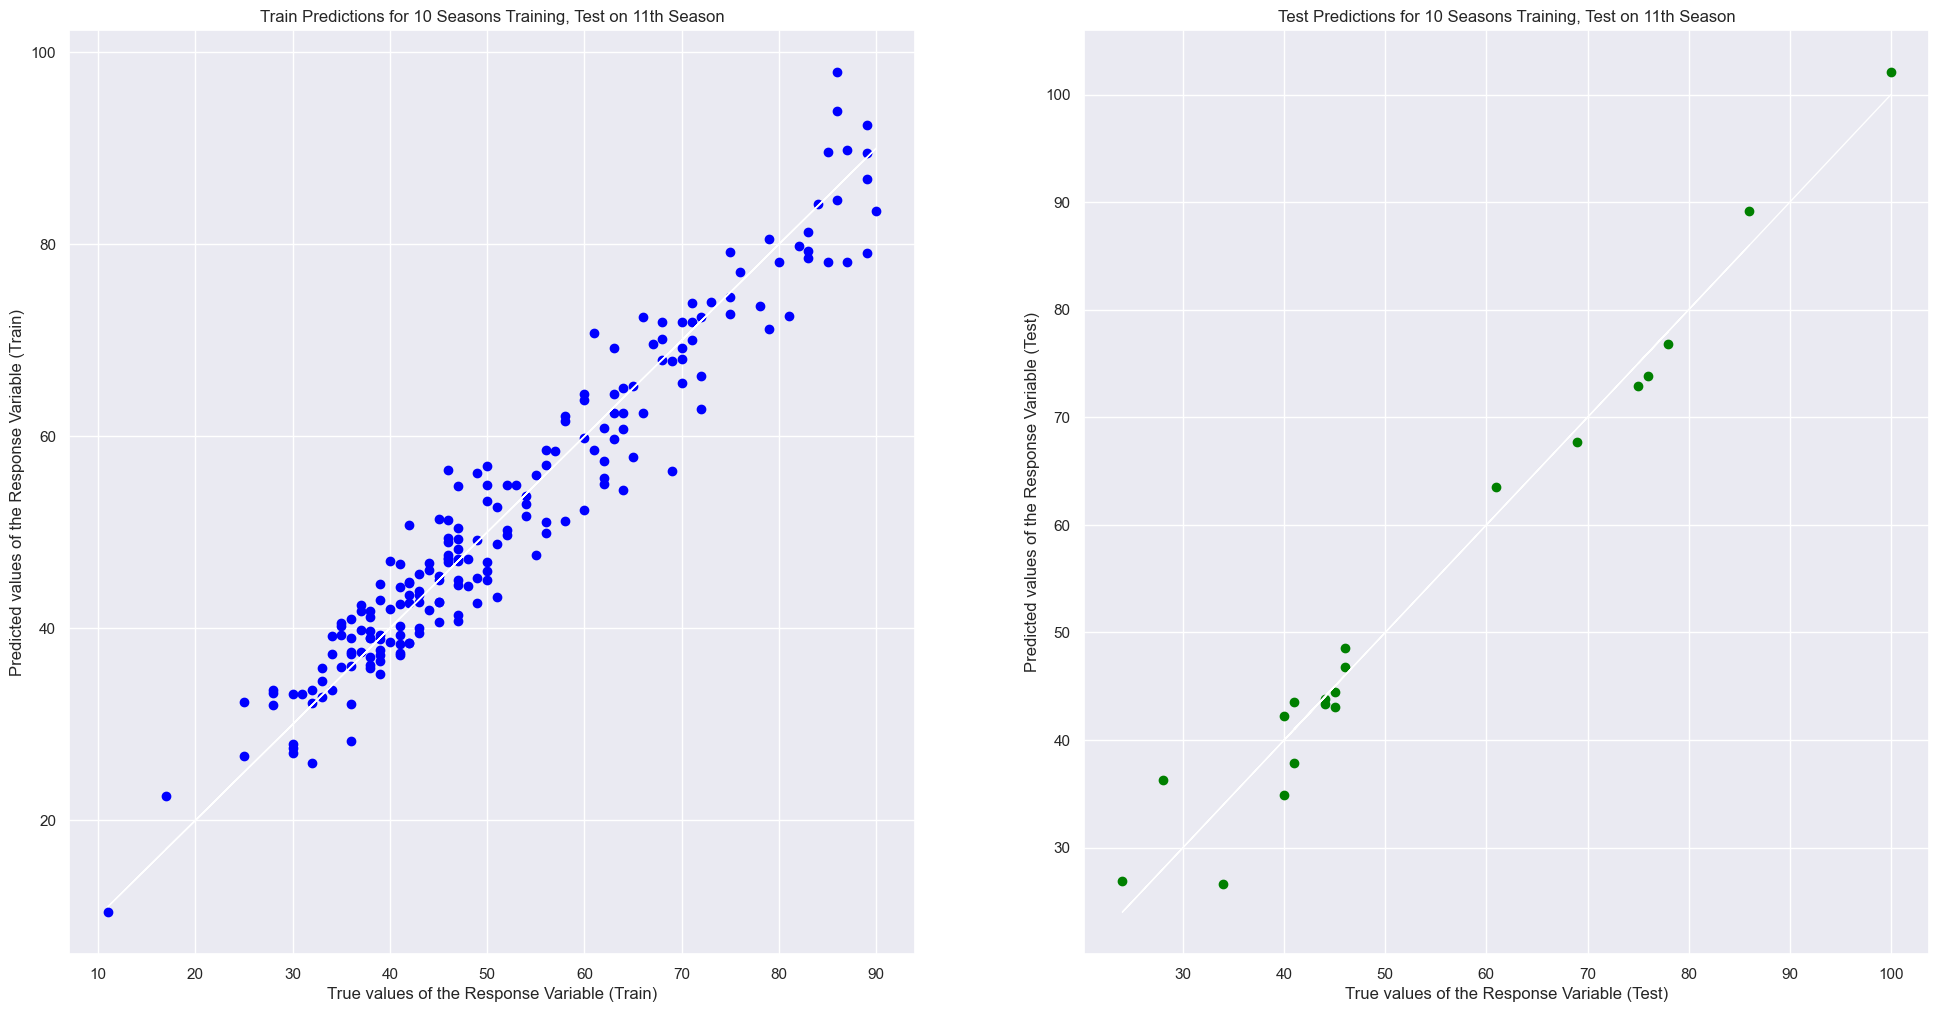

Goodness of Fit of Model 	Train Dataset (10 Seasons Training, Test on 11th Season)
Explained Variance (R^2) 	: 0.93710257373442
Mean Squared Error (MSE) 	: 17.726757456550374

Goodness of Fit of Model 	Test Dataset (10 Seasons Training, Test on 11th Season)
Explained Variance (R^2) 	: 0.9724301936369117
Mean Squared Error (MSE) 	: 11.16101578545312

Intercept of Regression for 11 Seasons Training, Test on 12th Season: b =  36.20027388777487
Coefficients of Regression for 11 Seasons Training, Test on 12th Season:
          Predictors  Coefficients
0              goals      0.652917
1     goals_conceded     -0.444523
2        clean_sheet      0.584893
3  total_scoring_att     -0.002797
4     goal_fastbreak      0.127399



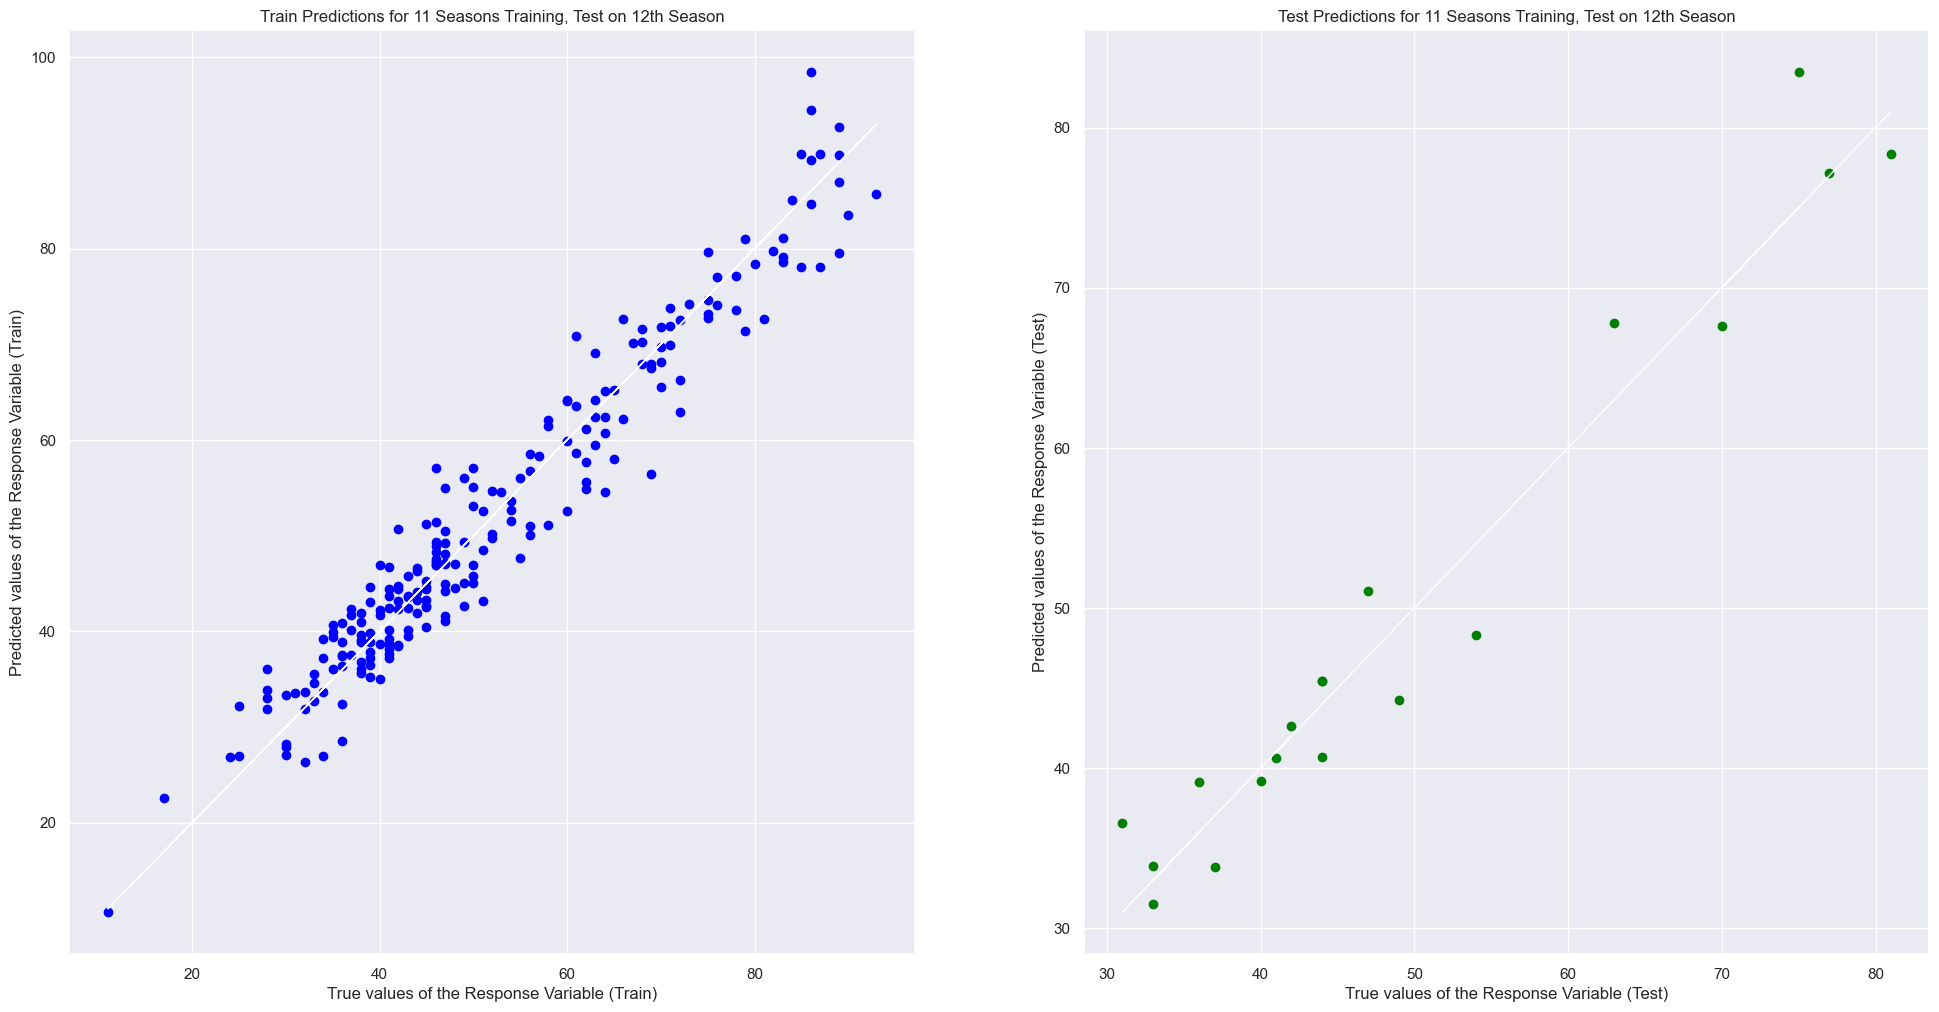

Goodness of Fit of Model 	Train Dataset (11 Seasons Training, Test on 12th Season)
Explained Variance (R^2) 	: 0.9402767874291595
Mean Squared Error (MSE) 	: 17.336951427184765

Goodness of Fit of Model 	Test Dataset (11 Seasons Training, Test on 12th Season)
Explained Variance (R^2) 	: 0.9453123805195607
Mean Squared Error (MSE) 	: 13.132906116338646



In [51]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


train_data_9_seasons = statsDataFrame.iloc[:180]   # First 9 seasons samples for training
test_data_10th_season = statsDataFrame.iloc[181:201]   # Number 10th season sample for testing

train_data_10_seasons = statsDataFrame.iloc[:200]   # First 10 seasons samples for training
test_data_11th_season = statsDataFrame.iloc[201:221]   # Number 11th sample for testing

train_data_11_seasons = statsDataFrame.iloc[:220]   # First 11 seasons samples for training
test_data_12th_season = statsDataFrame.iloc[221:241]   # Number 12th sample for testing


# Function to train the model and plot results
def train_and_plot(X_train, y_train, X_test, y_test, title_suffix):
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    # Output the intercept and coefficients
    print(f'Intercept of Regression for {title_suffix}: b = ', linreg.intercept_)
    print(f'Coefficients of Regression for {title_suffix}:')
    # Ensure that coefficients are formatted as a list of lists (if they are not already)
    coef_list = linreg.coef_.tolist()[0] if len(linreg.coef_.shape) > 1 else linreg.coef_.tolist()
    print(pd.DataFrame(list(zip(X_train.columns, coef_list)), columns=["Predictors", "Coefficients"]))
    print()

    # Predictions
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Visualization
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, y_train_pred, color="blue")
    axes[0].plot(y_train, y_train, 'w-', linewidth=1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[0].set_title(f"Train Predictions for {title_suffix}")

    axes[1].scatter(y_test, y_test_pred, color="green")
    axes[1].plot(y_test, y_test, 'w-', linewidth=1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    axes[1].set_title(f"Test Predictions for {title_suffix}")
    plt.show()

    # Goodness of Fit
    print(f"Goodness of Fit of Model \tTrain Dataset ({title_suffix})")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    print(f"Goodness of Fit of Model \tTest Dataset ({title_suffix})")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()
    
# Train and test for the 9th season
X_train = train_data_9_seasons[["goals", "goals_conceded", "clean_sheet", "total_scoring_att", "goal_fastbreak"]]
y_train = train_data_9_seasons["total_points"]
X_test = test_data_10th_season[["goals", "goals_conceded", "clean_sheet", "total_scoring_att", "goal_fastbreak"]]
y_test = test_data_10th_season["total_points"]

train_and_plot(X_train, y_train, X_test, y_test, "9 Seasons Training, Test on 10th Season")

# Train and test for the 10th season
X_train = train_data_10_seasons[["goals", "goals_conceded", "clean_sheet", "total_scoring_att", "goal_fastbreak"]]
y_train = train_data_10_seasons["total_points"]
X_test = test_data_11th_season[["goals", "goals_conceded", "clean_sheet", "total_scoring_att", "goal_fastbreak"]]
y_test = test_data_11th_season["total_points"]

train_and_plot(X_train, y_train, X_test, y_test, "10 Seasons Training, Test on 11th Season")

# Train and test for the 11th season
X_train = train_data_11_seasons[["goals", "goals_conceded", "clean_sheet", "total_scoring_att", "goal_fastbreak"]]
y_train = train_data_11_seasons["total_points"]
X_test = test_data_12th_season[["goals", "goals_conceded", "clean_sheet", "total_scoring_att", "goal_fastbreak"]]
y_test = test_data_12th_season["total_points"]

train_and_plot(X_train, y_train, X_test, y_test, "11 Seasons Training, Test on 12th Season")

# Classification

# Extra code

In [59]:
all_seasons = set(statsDataFrame['season'].unique())

# Group by 'team' and aggregate seasons into a set for each team
teams_seasons = statsDataFrame.groupby('team')['season'].agg(set)

# Filter teams that have data for all seasons
consistent_teams = teams_seasons[teams_seasons.apply(lambda x: x == all_seasons)]

# Extract the list of consistent teams
consistent_team_list = consistent_teams.index.tolist()

# Filter the original DataFrame to include only consistent teams
filtered_df = statsDataFrame[statsDataFrame['team'].isin(consistent_team_list)]
print("Teams that appeared in all seasons:", consistent_team_list)

Teams that appeared in all seasons: ['Arsenal', 'Chelsea', 'Everton', 'Liverpool', 'Manchester City', 'Manchester United', 'Tottenham Hotspur']


## Adding of new column "qualifications" to the statsDataFrame

Positions 1-4 qualify for champion's league | Position(s) 5 qualify for europa league | Positions 18-20 qualify for relegation | Remaining positions do not qualify for any other leagues

In [62]:
def determine_qualification(placement):
    if 1 <= placement <= 4:
        return 'Champions League'
    elif placement == 5:
        return 'Europa League'
    elif 18 <= placement <= 20:
        return 'Relegation'
    else:
        return 'No qualifications'

    
statsDataFrame['qualifications'] = statsDataFrame['placing'].apply(determine_qualification)
# Find the index of the 'placement' column
placement_index = statsDataFrame.columns.get_loc('placing')

# Insert the 'qualifications' column right after the 'placement' column
# We use placement_index + 1 to place it right after the 'placement' column
statsDataFrame.insert(placement_index + 1, 'qualifications_new', statsDataFrame['qualifications'])

# Now you can drop the old 'qualifications' column since it's duplicated
statsDataFrame.drop('qualifications', axis=1, inplace=True)

# Rename the new column back to 'qualifications'
statsDataFrame.rename(columns={'qualifications_new': 'qualifications'}, inplace=True)

statsDataFrame

,team,wins,losses,draw,total_points,placing,qualifications,goals,total_yel_card,total_red_card,...,total_long_balls,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,5.0,89.0,1,Champions League,83.0,60.0,1.0,...,2397.0,918.0,258.0,25686.0,46.5,1.0,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,11.0,83.0,2,Champions League,64.0,62.0,4.0,...,2270.0,897.0,231.0,24010.0,42.0,2.0,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,8.0,68.0,3,Champions League,57.0,44.0,0.0,...,2800.0,1107.0,282.0,24150.0,52.0,1.0,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,11.0,68.0,4,Champions League,63.0,59.0,3.0,...,2045.0,873.0,278.0,25592.0,54.0,1.0,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,9.0,60.0,5,Europa League,57.0,48.0,3.0,...,2408.0,796.0,181.0,22200.0,48.5,2.0,0.0,51.0,24.0,2006-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Huddersfield Town,9.0,19.0,10.0,37.0,16,No qualifications,28.0,62.0,3.0,...,2563.0,765.0,165.0,22619.0,21.0,6.0,2.0,31.0,24.0,2017-2018
236,Swansea City,8.0,21.0,9.0,33.0,17,No qualifications,28.0,51.0,1.0,...,2580.0,694.0,150.0,22775.0,26.0,1.0,3.0,44.0,15.0,2017-2018
237,Southampton,7.0,16.0,15.0,36.0,18,Relegation,37.0,63.0,2.0,...,2541.0,800.0,227.0,24639.0,37.0,4.0,1.0,29.0,13.0,2017-2018
238,Stoke City,7.0,19.0,12.0,33.0,19,Relegation,35.0,62.0,1.0,...,2528.0,598.0,136.0,20368.0,33.0,3.0,0.0,27.0,14.0,2017-2018
